In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Implementation - Modelling Intensity Fluctuations of Rayleigh Backscattered Coherent Light in Single-Mode Fibers

Here, we want to implement this equation:
$$ E_b (z = 0, k) = E_0 C A \sum_{i = 1}^N E_i $$
where
$$ E_i = \exp(j2\phi_{i-1}) \int_{d/2}^{-d/2} \exp(-\alpha(l + z_i) - j 2 \bar{n}_i k l)dl$$
and 
$$ \phi = \phi_{i - 1} + \bar{n}_i kd.$$
- $\alpha$, `α`: power attenuation coefﬁcient of the ﬁber
- $E_0$, `E_0`: launched ﬁeld
- $C$, `C`: average backscattering ﬁeld coefﬁcient
- $A$, `A`: mode ﬁeld effective area

In [18]:
α = 0.02 * np.log(10) / 10 * 1e-3           # db / km
E_0 = 0.001 / (np.pi * (8 / 1e3) ** 2)      # V / m (equivalent of 1 mW with a fiber of 8 mm diameter)
C = 70                                      # um^2
A = 2.13                                    # um^-2

We modelise the variation of the refractive index in the fiber as
$$ \bar{n}_i = 1.44 + \xi_i 10^{-7}. $$
in segments of $d = 1$ cm, where $\xi_i$ is a uniformly distributed random variable in $[0, 1]$. On pose une fibre de 1 km and $\phi_0 = 0$.

In [19]:
FIBER_LENGTH = 10e3                 # 10 km
AVERAGE_SEGMENT_SIZE = 1e-2         # 1 cm

number_of_segments = int(FIBER_LENGTH / AVERAGE_SEGMENT_SIZE)

n_bar = 1.44 + 1e-7 * np.random.rand(number_of_segments)
delta_d = np.random.rand(number_of_segments) / 10 - 0.05
d = (np.ones_like(n_bar) + delta_d) * 1e-2  # segments of 1 cm
z = np.cumsum(d)
k = 2 * np.pi / 1.55e-6

phi_i = np.zeros(number_of_segments + 1)
phi_i[1:] = np.cumsum(n_bar) * k * d

We can resolve analyticaly the integral to find
$$
\int_{-\mathrm{d} / 2}^{\mathrm{d} / 2} \exp \left(-\alpha\left(l+z_i\right)-j 2 \bar{n}_i k l\right) d l = \frac{2 \exp(-\alpha z_i) \sinh(\frac{d}{2} (\alpha + j 2 \bar{n}_i k))}{\alpha + j 2 \bar{n}_i k}
$$

In [20]:
'''
import sympy as sp

alpha, d, z_i, n_bar_i, k = sp.symbols("alpha d, z_i, n_bar_i, k", constant=True, real=True)
l = sp.symbols("l")

integrand = sp.exp(- alpha * (l + z_i) - sp.I * 2 * n_bar_i * k * l)
sp.integrate(integrand, (l , -d / 2, d / 2))
'''

'\nimport sympy as sp\n\nalpha, d, z_i, n_bar_i, k = sp.symbols("alpha d, z_i, n_bar_i, k", constant=True, real=True)\nl = sp.symbols("l")\n\nintegrand = sp.exp(- alpha * (l + z_i) - sp.I * 2 * n_bar_i * k * l)\nsp.integrate(integrand, (l , -d / 2, d / 2))\n'

In [21]:
E_i = np.exp(1j * 2 * phi_i[:-1]) * 2 * np.exp(-α * z) * np.sinh(d / 2 * (α + 1j * 2 * n_bar * k)) / (α + 1j * 2 * n_bar * k)

We then simulate the impact of pulse and detection.

In [22]:
pulse_width_points = 4000         # points

E_ip = np.convolve(E_i, np.ones(pulse_width_points))    
I_b = E_0 * C * A * np.abs(E_ip) ** 2

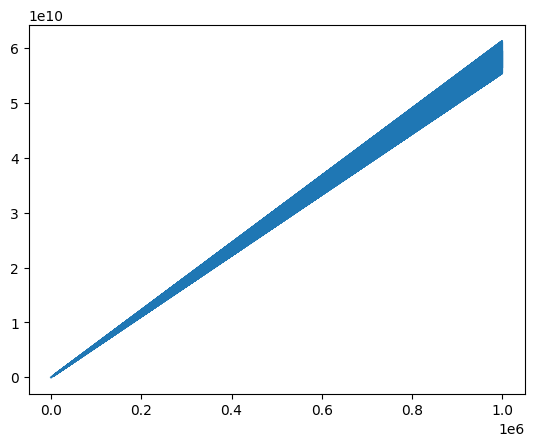

In [25]:
plt.plot(phi_i)
#plt.xlim(0 ,1000)